<a href="https://colab.research.google.com/github/labhalamanojkumar/icc-data-analyses/blob/manoj/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import calendar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/capstone project(Hotel Booking Analysis)-1/Hotel Bookings.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
df.shape

(119390, 32)

 1. Checking the data types 
 2. change the children into int64 (it's better to do this after handling the missing values)
 3. change the reservation_status_date into datetime
 4. combining the arrival_date_year,arrival_date_month,arrival_date_day_of_month into single column
 5. Handling the missing values
 6. Data Visualization

In [ ]:
#df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x : list(calendar.month_name).index(x))

In [ ]:
#df['arrival_date_month_in_numbers']=df['arrival_date_month']
#for key,value in months_zip:
 #df['arrival_date_month_in_numbers'] = df['arrival_date_month_in_numbers'].replace(key,value)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#converting reservation_status_date to datetime object
df['reservation_status_date']=df['reservation_status_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [ ]:
# combining the arrival_date_year,arrival_date_month,arrival_date_day_of_month into single column

df['arrival_date'] = df['arrival_date_day_of_month'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_year'].map(str)

#df.drop(columns = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],inplace=True)


In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1-July-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1-July-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-July-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-July-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,1-July-2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,1-July-2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,1-July-2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,1-July-2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,1-July-2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,1-July-2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
#Handling the missing values

missing_values = df.isnull().sum()
missing_values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#drop the column name "company " which cantain more then 90% missing values
df.drop('company',axis=1,inplace=True)


In [ ]:
#Replacing missing values using method "bfill" and "ffill".
df['agent'].fillna(method='bfill',inplace=True)
df['country'].fillna(method='ffill',inplace=True)
df['children'].fillna(method='ffill',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [ ]:
#cross check if any missing values
missing_values = df.isnull().sum()
missing_values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1-July-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1-July-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-July-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-July-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1-July-2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1-July-2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,1-July-2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,1-July-2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,1-July-2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,1-July-2015


#Data Visualization
***  I will try to answer the following questions ***

* Which hotel has more bookings?
* Which are the busiest months?
* Cancellation rate in the two hotels.
* Types of visitors? (No. of adults, children, babies)
* Repeated guests.
* Find the Length of stay in each hotel?
* Over view of special requests in each hotel

([<matplotlib.patches.Wedge at 0x7fb8c5730d50>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

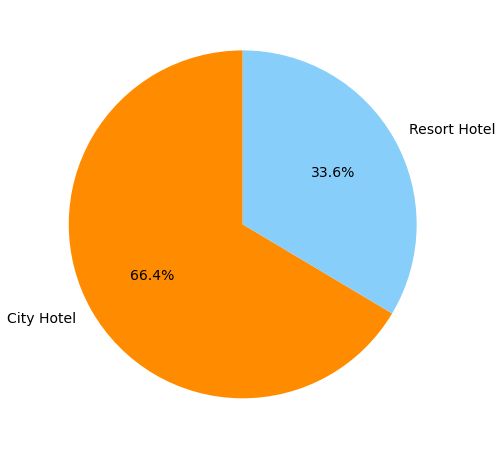

In [ ]:
#Which hotel has more bookings?
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# assigning labels and converting them to list 
labels = df['hotel'].value_counts().index.tolist()
# assigning magnitude and converting to list
sizes = df['hotel'].value_counts().tolist()

# assigning pie chart color
colors = ["darkorange","lightskyblue"]

# creating pie chart
# autopct enables you to display the percent value using Python string formatting. 0.1% will round off to the tenth place.

plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})


Here,majority of the bookings were made in "**city**" hotels. This could be because city hotels tend to be cheaper, everything is more accessible and more suitable for individuals or small groups of visitors.

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1-July-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1-July-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-July-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-July-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1-July-2015


Text(0, 0.5, 'Count')

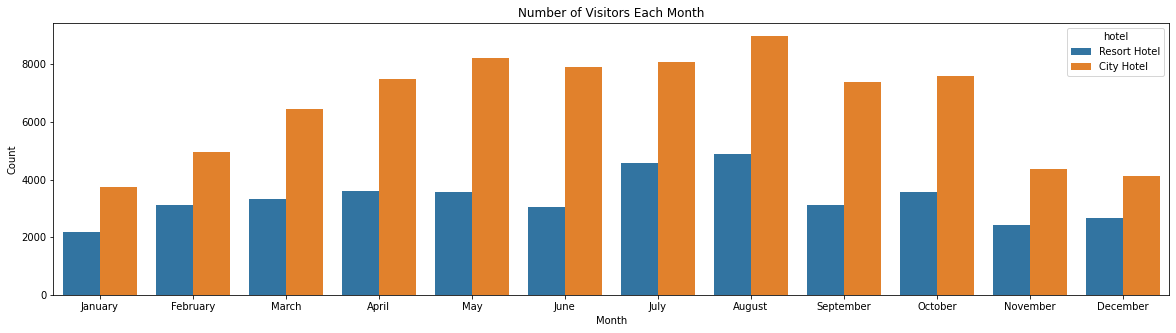

In [ ]:
#lets find Which are the most busy months in our data
# We can use a countplot as for visualising categorical data
plt.figure(figsize=(20,5))

# data we will use in a list
list_1 = ['hotel','arrival_date_month']

# plotting
sns.countplot(data = df[list_1],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Number of Visitors Each Month')
plt.xlabel('Month')
plt.ylabel('Count')


Here,we can say that August is the busiest month for both City hotels and Resort hotels whereas bookings are lowest during January for both types of hotels. This might be because of weather conditions as people prefer going for vacation during more comfortable seasons such as Spring/Summer and not during Winter.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Bookings Cancelled')

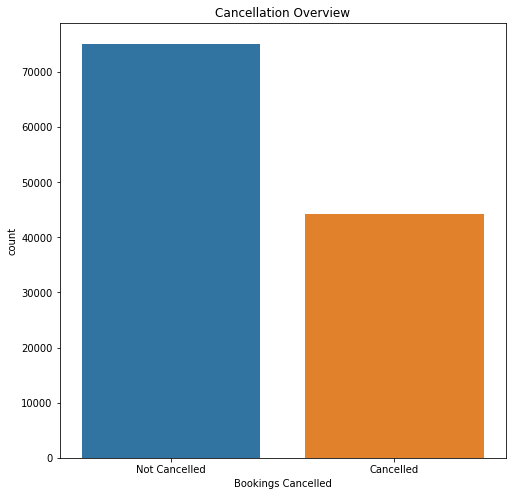

In [ ]:
#Cancellation rates in the two hotels.
df['is_canceled'] = df.is_canceled.replace([1,0],["Cancelled","Not Cancelled"])
cancelled_data = df['is_canceled']

# Plotting a countplot
sns.countplot(cancelled_data).set_title("Cancellation Overview")
plt.xlabel("Bookings Cancelled")

# Here , We can see that more then 60% of the bookings were not cancelled.

In [ ]:
# Now, we can find how much of bookings were cancelled in each type of hotel
list_2 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[list_2]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'Cancelled'].groupby(['hotel']).size().reset_index(name = 'count')
print(canceled_hotel)


          hotel  count
0    City Hotel  33102
1  Resort Hotel  11122


Text(0.5, 1.0, 'Cancellation rate in city and resort hotel')

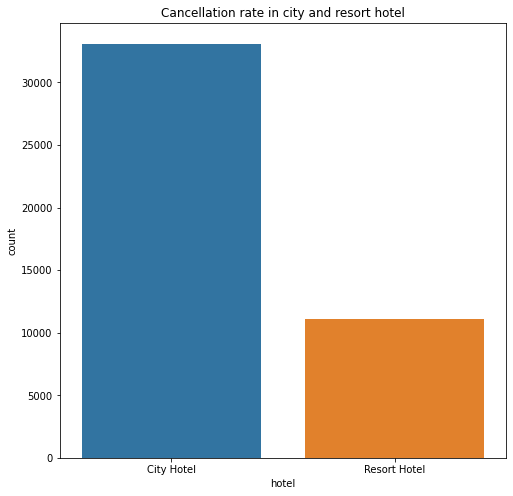

In [ ]:
#plot a Groph between two Hotels based on cancellation.
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Cancellation rate in city and resort hotel')

# Here, We can see that the City hotel have nearly three times more cancellations than Resort hotel and that is partially because city hotels have more bookings as we have analysed earlier.

Text(0.5, 1.0, 'Number of adults visiting each hotel')

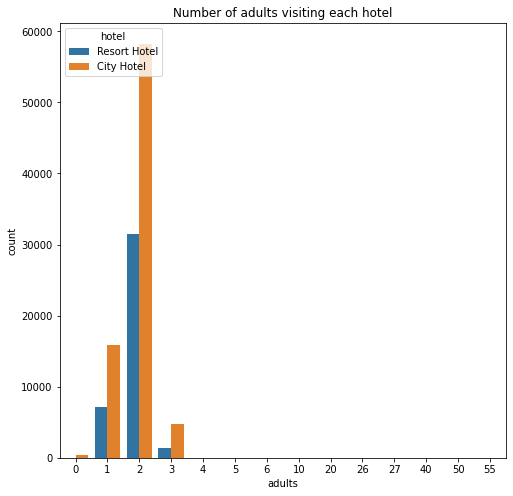

In [ ]:
#Now we can see Types of visitors in both the hotels (No. of adults, children, babies) By useing countplot as data is categorical.

sns.countplot(data=df,x='adults',hue='hotel').set_title("Number of adults visiting each hotel")


Text(0.5, 1.0, 'Number of children')

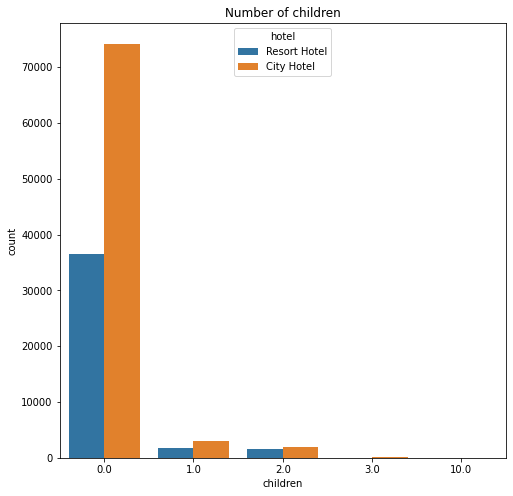

In [ ]:
# I will do the same for children  as adults
sns.countplot(data=df,x='children',hue='hotel').set_title("Number of children")

Text(0.5, 1.0, 'Number of babies')

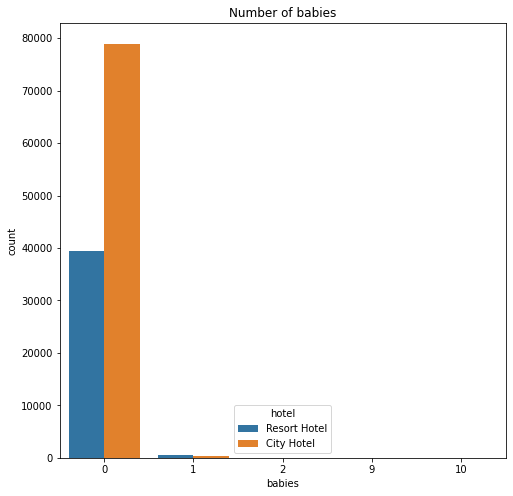

In [ ]:
#I will do the same for Babies as like adults and children
sns.countplot(data=df,x='babies',hue='hotel').set_title("Number of babies")

From this, we can see in the three plots, among adults mostly couples/two people make reservations in each hotel. For both hotels, it is common for poeple to not bring children or babies along but if they do, at most 1000-2000 with 1 child or children and  less then 500 single baby in both the hotels

Text(0.5, 1.0, 'Number of repeated guests')

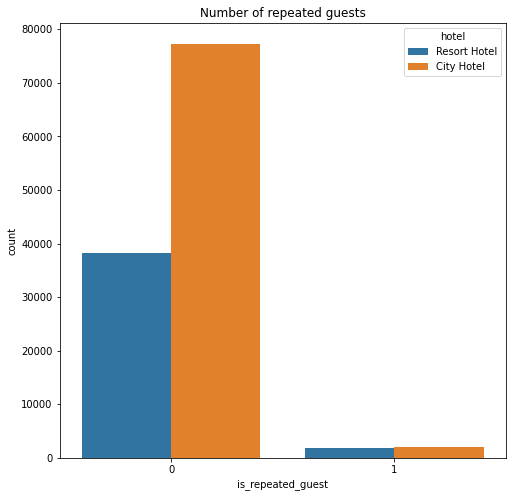

In [ ]:
# Now we can see the Repeated guests in both the hotels by using countplot.

sns.countplot(data=df,x="is_repeated_guest",hue="hotel").set_title("Number of repeated guests")

Here,
**0** Represents **Not repeated guests** and **1** represents **Repeated guests**. 
So we can see that most guests didn't return for visit.

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,Not Cancelled,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1-July-2015
1,Resort Hotel,Not Cancelled,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1-July-2015
2,Resort Hotel,Not Cancelled,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-July-2015
3,Resort Hotel,Not Cancelled,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1-July-2015
4,Resort Hotel,Not Cancelled,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1-July-2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [ ]:
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x : list(calendar.month_name).index(x))
df['arrival_date'] =  df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' +df['arrival_date_day_of_month'].map(str)
df['arrival_date']=df['arrival_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,Not Cancelled,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,Not Cancelled,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,Not Cancelled,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,Not Cancelled,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,Not Cancelled,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [ ]:
df['Length_of_stay_in_days'] = df['reservation_status_date']-df['arrival_date']

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Length_of_stay_in_days
0,Resort Hotel,Not Cancelled,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0 days
1,Resort Hotel,Not Cancelled,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0 days
2,Resort Hotel,Not Cancelled,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1 days
3,Resort Hotel,Not Cancelled,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1 days
4,Resort Hotel,Not Cancelled,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2 days


In [ ]:
df['Length_of_stay_in_days'] = pd.to_numeric(df['Length_of_stay_in_days'].dt.days, downcast='integer')

In [ ]:
df.head(25)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Length_of_stay_in_days
0,Resort Hotel,Not Cancelled,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,304.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0
1,Resort Hotel,Not Cancelled,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,304.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0
2,Resort Hotel,Not Cancelled,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1
3,Resort Hotel,Not Cancelled,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1
4,Resort Hotel,Not Cancelled,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2
5,Resort Hotel,Not Cancelled,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2
6,Resort Hotel,Not Cancelled,0,2015,7,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07-01,2
7,Resort Hotel,Not Cancelled,9,2015,7,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01,2
8,Resort Hotel,Cancelled,85,2015,7,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-01,-56
9,Resort Hotel,Cancelled,75,2015,7,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0,Transient,105.50,0,0,Canceled,2015-04-22,2015-07-01,-70


In [ ]:
df.describe()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Length_of_stay_in_days
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,91.771120,2.321149,101.831122,0.062518,0.571363,-29.677058
std,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,112.494611,17.594721,50.535790,0.245291,0.792798,70.068018
min,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,-526.000000
25%,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000,-26.000000
50%,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000,1.000000
75%,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,126.000000,0.000000,1.000000,3.000000
max,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,69.000000


In [ ]:
df['Length_of_stay_in_days'].value_counts()

 1      15747
 3      15723
 2      15479
 4      11024
 7       5679
        ...  
 20         1
-328        1
 57         1
-369        1
 48         1
Name: Length_of_stay_in_days, Length: 433, dtype: int64

In [ ]:
df.loc[df.Length_of_stay_in_days < 0, 'Length_of_stay_in_days'] = -1

In [ ]:
df['Length_of_stay_in_days'].value_counts()

-1     42137
 1     15747
 3     15723
 2     15479
 4     11024
 7      5679
 5      5119
 0      2793
 6      2322
 10      780
 8       719
 14      654
 9       526
 11      276
 12      125
 13       91
 15       39
 21       36
 28       23
 16       18
 17       15
 25       14
 22       10
 19        6
 18        6
 35        5
 29        3
 42        3
 30        2
 23        2
 46        1
 48        1
 49        1
 56        1
 57        1
 69        1
 43        1
 45        1
 60        1
 24        1
 27        1
 34        1
 38        1
 20        1
Name: Length_of_stay_in_days, dtype: int64

Text(0.5, 1.0, 'Length of stay in days in both Hotels')

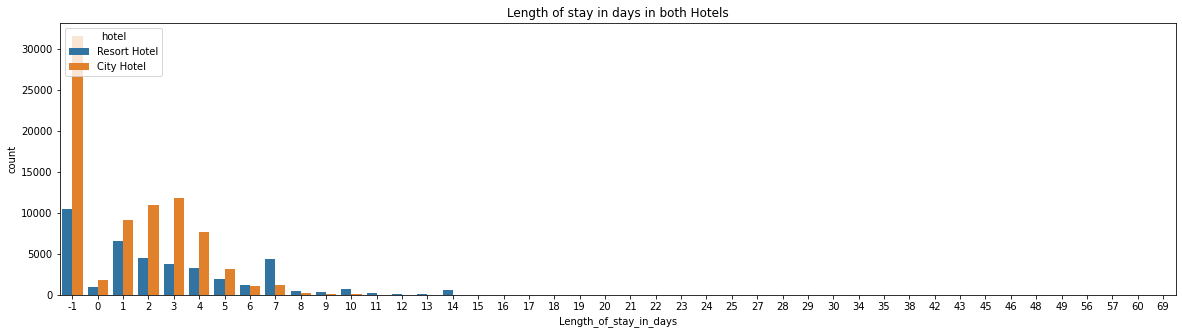

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x="Length_of_stay_in_days",hue="hotel").set_title("Length of stay in days in both Hotels")

Here, **-1** Represents Cancellation and other numbers are Representing how many days a guest stay in each hotel. comparitively city hotel have more cancelletion and Resort hotel cantain more no of guests stayed more then 10 to 15 days. As per data in guests r preffering to stay more no of days in Resort hotel. and guestr are staying mimnimal length of days 1-4 days in City Hotel.

In [ ]:
df['total_of_special_requests'].value_counts()


0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

Text(0.5, 1.0, 'Total of special requests for both Hotels')

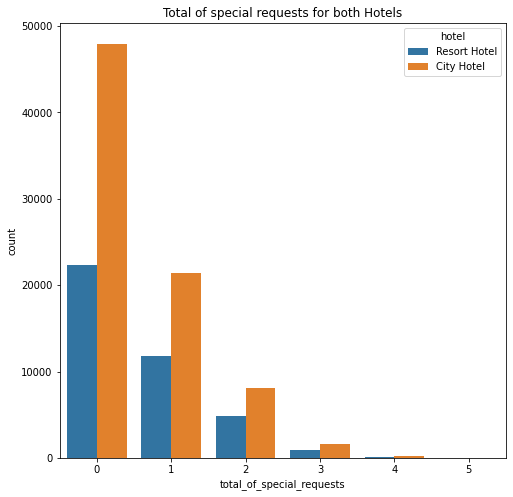

In [ ]:
sns.countplot(data=df,x="total_of_special_requests",hue="hotel").set_title("Total of special requests for both Hotels")

In [ ]:
df.corr()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Length_of_stay_in_days
lead_time,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.071154,0.170084,-0.063077,-0.116451,-0.095712,-0.081727
arrival_date_year,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.046055,-0.056497,0.197580,-0.013684,0.108531,-0.007999
arrival_date_month,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,0.028534,0.005437,0.010172,-0.030729,0.037479,-0.021640,0.004809,-0.030094,0.019045,0.079315,0.000257,0.028026,0.010784
arrival_date_week_number,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.029697,0.022933,0.075791,0.001920,0.026149,0.011578
arrival_date_day_of_month,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.009399,0.022728,0.030245,0.008683,0.003062,-0.008075
stays_in_weekend_nights,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.113092,-0.054151,0.049342,-0.018554,0.072671,0.422260
stays_in_week_nights,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.153741,-0.002020,0.065237,-0.024859,0.068192,0.506980
adults,0.119519,0.029635,0.028534,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.027009,-0.008283,0.230641,0.014785,0.122884,0.027644
children,-0.037613,0.054636,0.005437,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.030975,-0.033271,0.324853,0.056255,0.081736,0.005763
babies,-0.020915,-0.013192,0.010172,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.033384,-0.010621,0.029186,0.037383,0.097889,0.035196


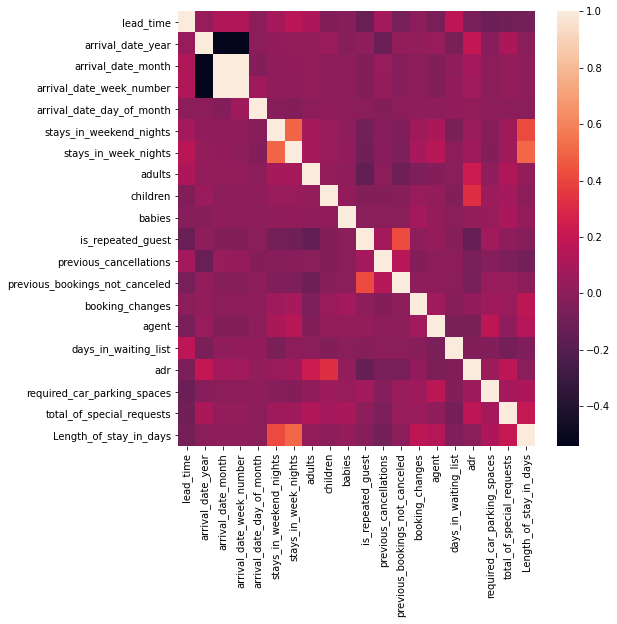

In [ ]:
sns.heatmap(df.corr())

#My Final Analysis
**Here's some sugestions to both the hotels for improve business in the future:**

* Resort hotel tend to have less bookings in comparison to city hotel so they need to work on their marketing strategy and promote the hotel more, especially in social media.
* Resort hotel could also reduce prices to increases booking percentages.
May-August happens to be the busiest months, but the hotel should target more customers and try to do more business during these times.
* Although city hotel have more bookings, they also tend to have more cancellations so to prevent this they could take advance money during vacation.
* This would ensure most bookings to not being cancelled. They could also apply no-refund policies or make the refund policies rather strict so the customers choose not to cancel.
* It is quite clear most customers travel in pairs and bringing children or babies along are very rare. F


or that both hotels could advertise in ways that attract couples more and also business travellers.
* Most guests do not return but as these customers have already visited once, advertisements should be targeted in such ways so they are bound to return the next time they visit. The customers could also be offered special benefits if they do return to stay.